# Introduction

In this, we're going to analyze a [dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) about the westbound traffic on the I-94 Interstate highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

In [2]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Read in csv and look at data
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

A station located approximately midway between Minneapolis and Saint Paul records the traffic data (see the dataset documentation). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## Analyzing Traffic Volume

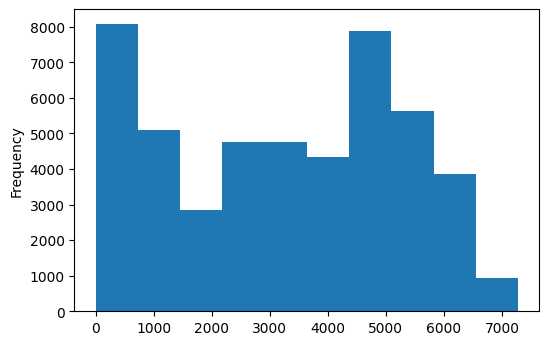

In [4]:
traffic['traffic_volume'].plot.hist()
plt.show()

In [5]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## Traffic Volume: Day vs. Night


In [6]:
traffic["date_time"]=pd.to_datetime(traffic["date_time"])
day = traffic[(traffic["date_time"].dt.hour >=7) & 
              (traffic["date_time"].dt.hour <19)]
night = traffic[(traffic["date_time"].dt.hour <7) | 
              (traffic["date_time"].dt.hour >=19)]
day.shape, night.shape

((23877, 9), (24327, 9))

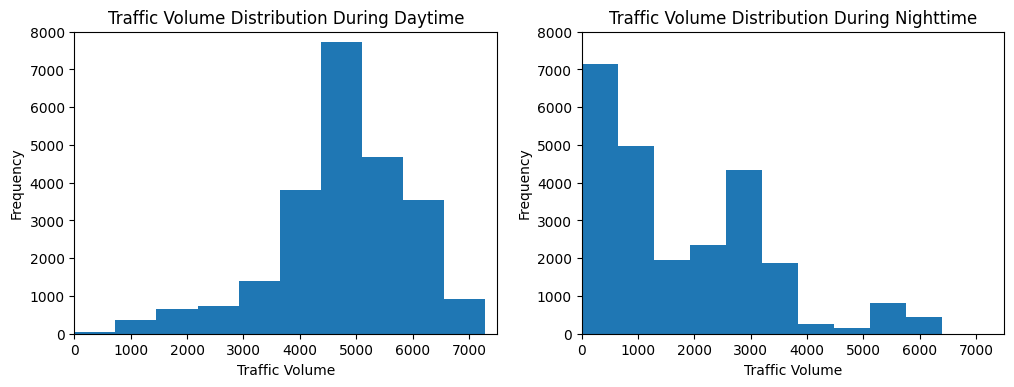

In [7]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.title("Traffic Volume Distribution During Daytime")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim((0,7500))
plt.ylim((0,8000))
plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.title("Traffic Volume Distribution During Nighttime")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim((0,7500))
plt.ylim((0,8000))
plt.show()

In [8]:
day["traffic_volume"].describe(), night["traffic_volume"].describe()

(count    23877.000000
 mean      4762.047452
 std       1174.546482
 min          0.000000
 25%       4252.000000
 50%       4820.000000
 75%       5559.000000
 max       7280.000000
 Name: traffic_volume, dtype: float64,
 count    24327.000000
 mean      1785.377441
 std       1441.951197
 min          0.000000
 25%        530.000000
 50%       1287.000000
 75%       2819.000000
 max       6386.000000
 Name: traffic_volume, dtype: float64)

In [9]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-9-b104fbd4ed31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

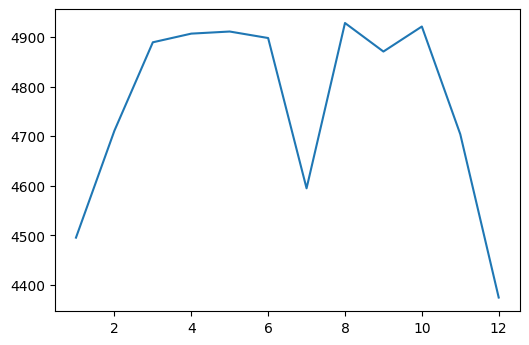

In [10]:
plt.plot(by_month["traffic_volume"])
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October). Interestingly, the one exception to be made is July, so we will look more into that.

<ipython-input-11-cba92ca5a37a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



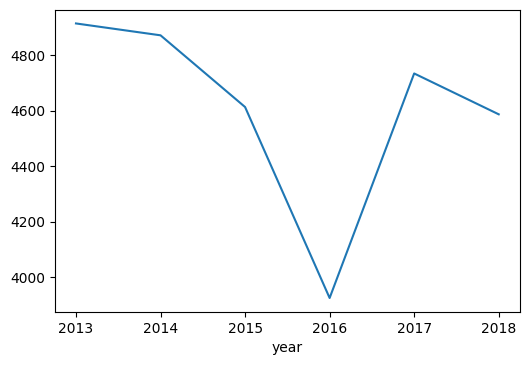

In [11]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction.

In [12]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-12-e4e897828b56>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

We will now take a look at more specific time value: day of the week.

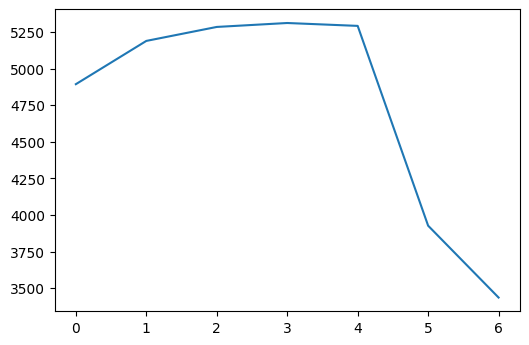

In [13]:
plt.plot(by_dayofweek["traffic_volume"])
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday).

In [14]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-14-a10e9c766806>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



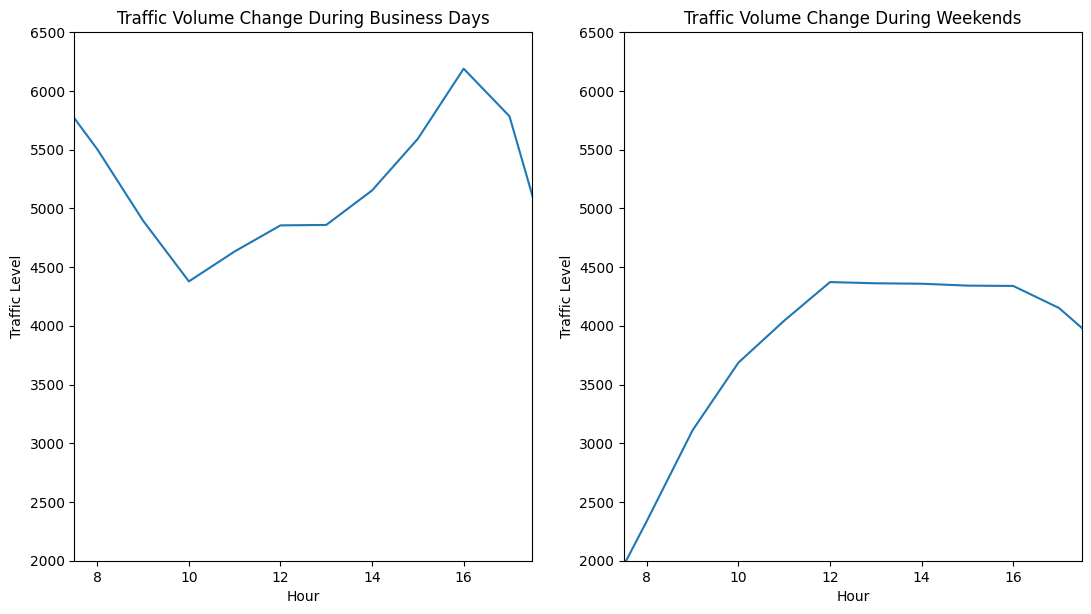

In [23]:
plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
plt.plot(by_hour_business["traffic_volume"])
plt.title("Traffic Volume Change During Business Days")
plt.xlabel("Hour")
plt.ylabel("Traffic Level")
plt.xlim((7.5,17.5))
plt.ylim((2000,6500))
plt.subplot(1,2,2)
plt.plot(by_hour_weekend["traffic_volume"])
plt.title("Traffic Volume Change During Weekends")
plt.xlabel("Hour")
plt.ylabel("Traffic Level")
plt.xlim((7.5,17.5))
plt.ylim((2000,6500))

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. 

## Weather Indicators

Another possible indicator of heavy traffic is weather, which we will take a look at now.

In [16]:
day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

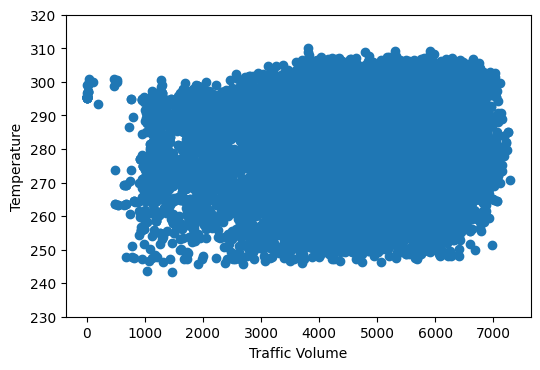

In [26]:
plt.scatter(day["traffic_volume"], day["temp"])
plt.ylim((230,320))
plt.ylabel("Temperature")
plt.xlabel("Traffic Volume")
plt.show()

From this scatterplot showing the relationship between temperature and traffic volume, e can conclude that temperature doesn't look like a solid indicator of heavy traffic.

In [18]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

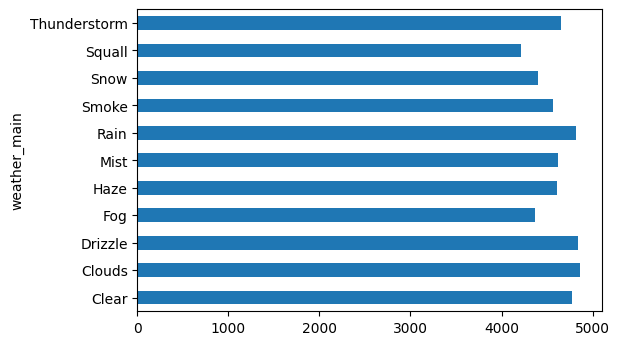

In [19]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by `weather_description`, which has a more granular weather classification.

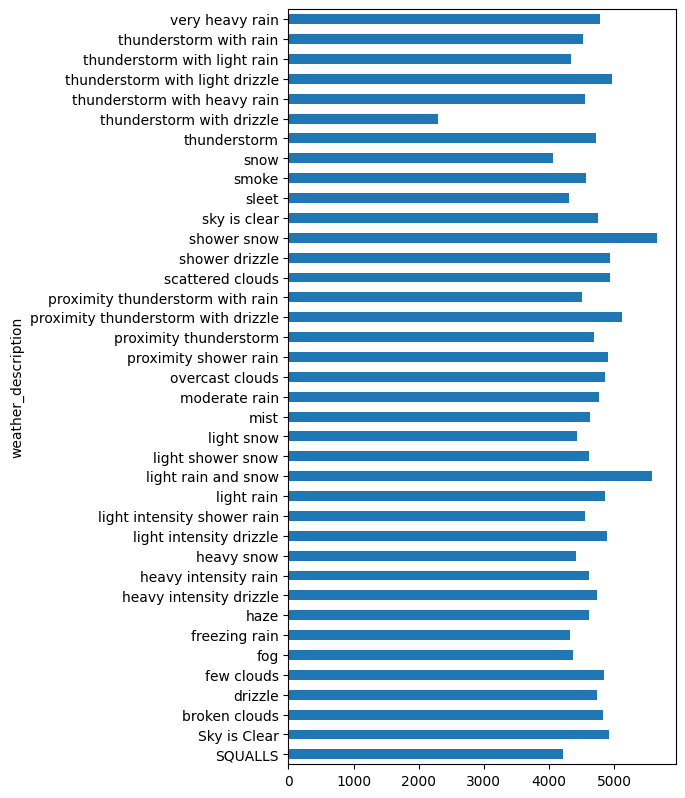

In [28]:
by_weather_description["traffic_volume"].plot.barh(figsize = (5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Proximity thunderstorm with drizzle
* Light rain and snow

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Maybe more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* Time indicators
    * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    * The traffic is usually heavier on business days compared to the weekends.

    * On business days, the rush hours are around 7 and 16.

* Weather indicators

    * Shower snow

    * Proximity thunderstorm with drizzle
    * Light rain and snow